# Lab 7 BF550

We will be using data from a paper on biofilm formation on [diatoms](https://en.wikipedia.org/wiki/Thalassiosira_pseudonana).

Marine diatoms are a proxy for the effects of climate change on the oceans as they are [sensitive to changes](https://www.nature.com/articles/s41558-019-0557-y). They are also a foundation of the oceans food web. Therefore, understanding how diatoms adapt to increased ocean temperatures and acidification is imperitive to predict climate change's future effects.

Diatoms also have a resident microbiota of bacteria, which may confer protections and vital nutrients that help with adaptations under duress. The paper we will be studying has carried out a 400-generation selection for bacterial biofilm formation on the diatoms in several conditions. Using their data, we will rediscover several properties about how diatoms and biofilms react to stressors.

Paper: https://aslopubs.onlinelibrary.wiley.com/doi/10.1002/lno.11050

Datasets: https://zenodo.org/record/1438977

In [37]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats

In [38]:
# load the dataset
columns = ["cell_number", "average_cell_size", "pct_coverslip_covered", "date", # let's change the column names to something more informative
           "selection_temperature", "nutrient_level", "week", "biofilm_formation_rate", "evoplas", "assay_temperature"]
df1 = pd.read_csv('20180930_biofilm_trajectories.csv', names=columns, header=0)
print(len(df1))
df1.head()

905


,cell_number,average_cell_size,pct_coverslip_covered,date,selection_temperature,nutrient_level,week,biofilm_formation_rate,evoplas,assay_temperature
0,2641.0,0.007,15.780,30/04/2015,FS,n+,2,1.020919,evo,FS
1,3217.0,98.562,10.079,14/05/2015,22,n-,4,0.652081,evo,22
2,1191.0,91.013,33.446,14/05/2015,22,n-,4,2.163856,evo,22
3,1076.0,97.420,33.332,14/05/2015,22,n-,4,2.156480,evo,22
4,5641.0,0.004,66.578,06/08/2015,22,n-,18,2.598774,evo,22


# Problem 1: Central Limit Theorum
1. Subset the DataFrame to contain only weeks 26 and later. We will be treating samples from the same nutrient_level and selection_temperature as independent samples. 
2. Plot the 'pct_coverslip_covered' histogram for the samples with the following characteristics:

|Variable|Value|
|-|-|
|selection_temperature|26|
|nutrient_level|n-|

3. Print the mean and standard deviation of the population.

4. Illustrate the central limit theorum. Sample the above population 10, 100, and 1000 times using a sample size of 10. Plot the histogram of the means of each of these trials.

5. Print the mean and standard deviation of the 1000 trial case. What is the relationship between this standard deviation and that from part 3?

**Challenge:**
    
Using the paper and the descriptions on the data repository linked above, try to determine how we could further subset the data to make it more normal. Put another way: how are we including data that may muddy the analysis? Plot the histogram of this subset. 

In [42]:
df2 = df1[df1.week.ge(26)] # ge = greater than or equal to /lt = less than
#df2 = df1[df1["week"] >= 26
print("Length of df with weeks >= 26:: ", len(df2))
df2.head()

Length of df with weeks >= 26::  422


,cell_number,average_cell_size,pct_coverslip_covered,date,selection_temperature,nutrient_level,week,biofilm_formation_rate,evoplas,assay_temperature
483,0.0,0.0,84.287630,18/09/2015,22,n-,26,0.0,evo,22
484,0.0,0.0,88.666910,18/09/2015,22,n+,26,0.0,evo,22
485,0.0,0.0,94.557968,18/09/2015,22,n+,26,0.0,evo,22
486,0.0,0.0,87.960550,30/09/2015,22,n+,26,0.0,evo,22
487,0.0,0.0,76.398457,30/09/2015,22,n-,26,0.0,evo,22


Length of subsetted df::  75
93.28729028866667 2.6230907181282004


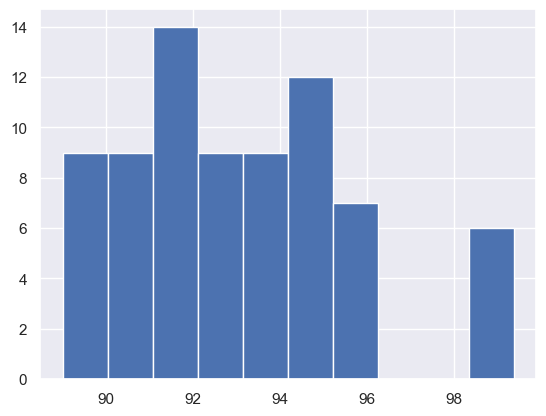

In [47]:
subset = df2.loc[(df2['selection_temperature']=='26') & (df2['nutrient_level']=='n-')] 
print("Length of subsetted df:: ", len(subset))
#subset.head()
coverslips = subset.pct_coverslip_covered
#coverslips
fig = plt.hist(coverslips)
print(coverslips.mean(), coverslips.std())



4. Illustrate the central limit theorum. Sample the above population 10, 100, and 1000 times using a sample size of 10. Plot the histogram of the means of each of these trials.

5. Print the mean and standard deviation of the 1000 trial case.

[92.2   93.727 92.598 92.937 93.    92.056 91.812 92.51  92.959 93.227]


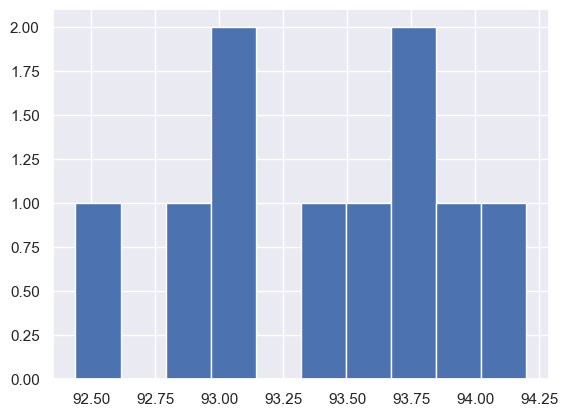

In [48]:
#let's do ten samples like this, and calculate means
sample_size = 10
n_samples = 10
def central_limit(sample_size,n_samples):
    sample_means = np.zeros(n_samples)
    for i in range(n_samples):
        sample = coverslips.sample(n=sample_size, replace=True)#sample with repalcement
        sample_means[i] = sample.mean()
        
    fig = plt.hist(sample_means)
print(sample_means)
central_limit(sample_size,n_samples)

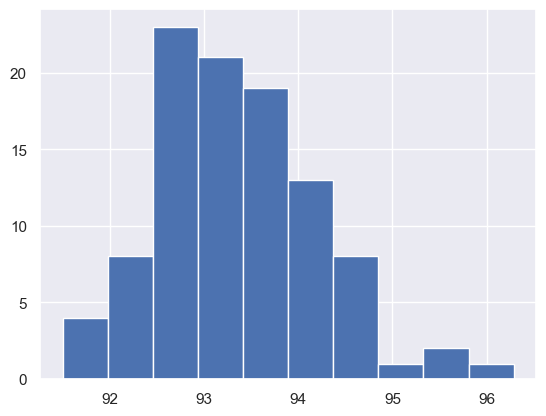

In [49]:
#let's do ten samples like this, and calculate means
sample_size = 10
n_samples = 100
central_limit(sample_size,n_samples)

92.7026298831 0.5517831018950942


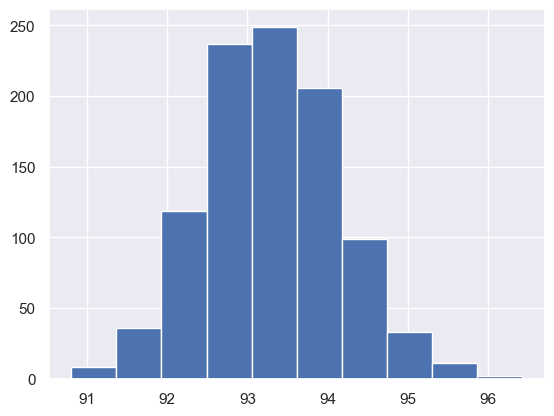

In [50]:
#let's do ten samples like this, and calculate means
sample_size = 10
n_samples = 1000
central_limit(sample_size,n_samples)
print(sample_means.mean(), sample_means.std())

# Problem 2: Bootstrapping
Using the subsetted DataFrame from problem 1:
1. Use bootstrapping to estimate the population mean and standard deviation 'pct_coverslip_covered' of the above subset. Make sure to use an iteration count >1000.

2. Use your estimated population mean and standard deviation to overlay a normal curve onto the histogram from Problem 1 part 2.

3. Shade the 95% confidence intervals for the normal curve (hint: look at Monday's class notebooks).

In [54]:
iteration_count = 1000
for i in range(iteration_count):
    trails= np.random.choice(coverslips,size=len(coverslips))
print(trails.shape)
tMean=trails.mean()                         
tStd =trails.std()

(75,)


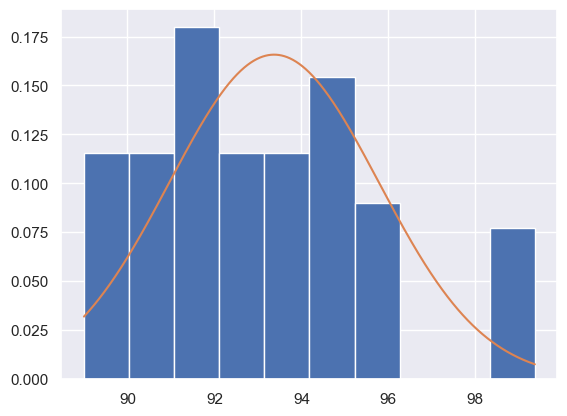

In [34]:
# overlay a normal curve onto the histogram  using seaborn
x=np.linspace(coverslips.min(),coverslips.max(),1000)
norm= stats.norm.pdf(x,loc=tMean,scale=tStd)

fig=plt.hist(coverslips,density=True)
fig=plt.plot(x,norm)

# Problem 3
Using the estimated population mean and standard deviation you found in Problem 2:
1. Find the z-value for a 'pct_coverslip_covered' value of 30.
2. Use the z-value to find the probabilty of getting a value < 30 (p-value).
3. What is the probaility of getting a value *exactly* 30.
3. What is the probability of getting a value > 30?

In [ ]:
# z = (30 - mu) / (std / np.sqrt(n))
# print('The p-value is, P(z < ) =',stats.norm.cdf(z))

# Problem 4:
We will be using the assay data from Figure 6 in the paper.

1. Make a box plot of the '%coverslip_covered' for each selection temperature. Color the box plot by nutrient status.
2. Using what you learned in class, determine if there is a statistical difference in '%coverslip_covered' between the full nutrient (n+) and low nutrient (n-) conditions for each temperature condition.

What does this tell us about biofilm evolution under different nutrient levels? 

In [ ]:
# load the dataset
df3 = pd.read_csv('20180930Ability_to_form_biofilms.csv')

# let's change the column names to something more informative
columns = ["cell_number", "average_cell_size", "%coverslip_covered", "date", "selection_temperature", "nutrient_level", "biofilm_formation_rate", "evoplas", "assay_temperature"]
df3.columns = columns
df3.head()

,cell_number,average_cell_size,%coverslip_covered,date,selection_temperature,nutrient_level,biofilm_formation_rate,evoplas,assay_temperature
0,5641,0.004,66.578,06/08/2015,22,n-,2.598774,evo,22
1,3610,0.005,47.528,06/08/2015,22,n+,1.855186,evo,22
2,3565,0.004,45.482,06/08/2015,22,n+,1.775323,evo,22
3,2293,0.011,73.157,06/08/2015,22,n+,2.855576,evo,22
4,806,0.040,91.980,06/08/2015,22,n-,3.590304,evo,22
